# Amazon AI API Services

https://aws.amazon.com/machine-learning/ai-services/

No Machine Learning Background is needed, this is for everyone

![title](https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/08/15/ai-hackathon.gif)

## Polly Examples

In [63]:
import boto3

polly_client = boto3.client('polly')

text_source = "Today is a good day to start your journey to AI"

response = polly_client.synthesize_speech(VoiceId='Joanna',
                OutputFormat='mp3', 
                Text = text_source)

from pathlib import Path
Path("./output").mkdir(parents=True, exist_ok=True)

file = open('./output/speech.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()

In [6]:
import IPython
IPython.display.Audio("./output/speech.mp3")

## Translate Examples

Let's translate it to Hebrew

In [64]:
trans_client = boto3.client('translate')

response = trans_client.translate_text(
    Text=text_source,
    SourceLanguageCode='auto',
    TargetLanguageCode='he'
)

translated = response['TranslatedText']

#translated = translated.encode('UTF-8')
print(translated)

היום הוא יום טוב להתחיל את המסע שלכם אל הבינה המלאכותית


How good MT is today?

In [12]:
old_joke = 'The spirit is willing but the flesh is weak'

response = trans_client.translate_text(
    Text=old_joke,
    SourceLanguageCode='auto',
    TargetLanguageCode='he'
)

translated = response['TranslatedText']
print(translated)

response = trans_client.translate_text(
    Text=translated,
    SourceLanguageCode='auto',
    TargetLanguageCode='en'
)

translated = response['TranslatedText']
print(translated)



הרוח מוכנה, אבל הבשר חלש.
The wind is ready, but the flesh is weak.


And now let's translate to German and also speak it

In [15]:
trans_client = boto3.client('translate')

response = trans_client.translate_text(
    Text=text_source,
    SourceLanguageCode='auto',
    TargetLanguageCode='de'
)

translated = response['TranslatedText']
print(translated)

response = polly_client.synthesize_speech(VoiceId='Vicki',
                OutputFormat='mp3', 
                Text = translated)

file = open('output/translation.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()
IPython.display.Audio("output/translation.mp3")

Heute ist ein guter Tag, um Ihre Reise zur KI zu beginnen


Let's check which are the Russian voices (male and female)

In [16]:
describeVoiceResponse = polly_client.describe_voices(LanguageCode='ru-RU')

In [18]:
print(describeVoiceResponse)

{'ResponseMetadata': {'RequestId': '52869c55-81a2-47f5-91cc-7dc6ced1e582', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '52869c55-81a2-47f5-91cc-7dc6ced1e582', 'content-type': 'application/json', 'content-length': '349', 'date': 'Mon, 21 Jun 2021 11:07:17 GMT'}, 'RetryAttempts': 0}, 'Voices': [{'Gender': 'Male', 'Id': 'Maxim', 'LanguageCode': 'ru-RU', 'LanguageName': 'Russian', 'Name': 'Maxim', 'SupportedEngines': ['standard']}, {'Gender': 'Female', 'Id': 'Tatyana', 'LanguageCode': 'ru-RU', 'LanguageName': 'Russian', 'Name': 'Tatyana', 'SupportedEngines': ['standard']}]}


In [19]:
import pandas as pd
pd.DataFrame.from_dict(describeVoiceResponse['Voices'])

Gender       Id LanguageCode LanguageName     Name SupportedEngines
0    Male    Maxim        ru-RU      Russian    Maxim       [standard]
1  Female  Tatyana        ru-RU      Russian  Tatyana       [standard]

and translate our sentence to Russian and speak it out loud

In [22]:
trans_client = boto3.client('translate')

response = trans_client.translate_text(
    Text=text_source,
    SourceLanguageCode='auto',
    TargetLanguageCode='ru'
)

translated = response['TranslatedText']
print(translated)

response = polly_client.synthesize_speech(VoiceId='Tatyana',
                OutputFormat='mp3', 
                Text = translated)

file = open('output/translation.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()
IPython.display.Audio("output/translation.mp3")

Сегодня хороший день, чтобы начать свой путь к ИИ


## Rekognition Examples

### Face Detection

In [24]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/4c/Brad_Pitt_2019_by_Glenn_Francis.jpg', width=400)

In [25]:
rek_client = boto3.client('rekognition')

response = rek_client.detect_faces(
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/brad.jpg'
        }
    },
    Attributes=[
        'ALL'
    ]
)

response['FaceDetails'][0]['Gender']

{'Value': 'Male', 'Confidence': 98.07132720947266}

In [26]:
pd.DataFrame.from_dict(response['FaceDetails']).T

0
BoundingBox  {'Width': 0.2084767073392868, 'Height': 0.2973...
AgeRange                               {'Low': 30, 'High': 46}
Smile        {'Value': False, 'Confidence': 98.73219299316406}
Eyeglasses   {'Value': False, 'Confidence': 99.78036499023438}
Sunglasses     {'Value': False, 'Confidence': 99.885986328125}
Gender       {'Value': 'Male', 'Confidence': 98.07132720947...
Beard        {'Value': False, 'Confidence': 56.69363784790039}
Mustache     {'Value': False, 'Confidence': 96.23612976074219}
EyesOpen       {'Value': True, 'Confidence': 99.7124252319336}
MouthOpen     {'Value': False, 'Confidence': 97.7191390991211}
Emotions     [{'Type': 'CALM', 'Confidence': 83.41294860839...
Landmarks    [{'Type': 'eyeLeft', 'X': 0.3633786141872406, ...
Pose         {'Roll': -9.064095497131348, 'Yaw': 2.44531321...
Quality      {'Brightness': 77.61134338378906, 'Sharpness':...
Confidence                                             99.9993

In [41]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/en/9/97/Doc_Brown.JPG', width=400)

In [42]:
rek_client = boto3.client('rekognition')

response = rek_client.detect_faces(
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/doc1.jpeg'
        }
    },
    Attributes=[
        'ALL'
    ]
)

response['FaceDetails'][0]['Gender']

{'Value': 'Male', 'Confidence': 86.21263885498047}

### Celebrity Recognition

In [43]:
response = rek_client.recognize_celebrities(
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/brad.jpg'
        }
    },
)

response['CelebrityFaces'][0]['Name']

'Brad Pitt'

In [35]:
pd.DataFrame.from_dict(response['CelebrityFaces']).T

0
Urls                                 [www.imdb.com/name/nm0000093]
Name                                                     Brad Pitt
Id                                                          1q4IR5
Face             {'BoundingBox': {'Width': 0.28544774651527405,...
MatchConfidence                                                 97

In [44]:
response = rek_client.recognize_celebrities(
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/doc1.jpeg'
        }
    }
)

response['CelebrityFaces'][0]['Name']

IndexError: list index out of range

Sadly, Rekognition doesn't include christopher lloyd in its celebrity collection.

Let's create our own celebreties collection

In [ ]:
response = rek_client.create_collection(
    CollectionId='MyCelebreties'
)

In [45]:
from IPython.display import Image
Image(url='http://4.bp.blogspot.com/--bwUKm2LaCU/UGxBSrclenI/AAAAAAAAAK8/ET0a3bDEe0I/s1600/doc.jpg', width=400)

And add an image of Emma Watson from the Harry Potter movies

In [49]:
response = rek_client.index_faces(
    CollectionId='MyCelebreties',
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/doc2.jpeg'
        }
    },
    
    ExternalImageId='christopher_lloyd'
)

In [50]:
pd.DataFrame.from_dict(response['FaceRecords']).T

0
Face        {'FaceId': '20420b4d-7ea4-4a9f-8f61-2588753515...
FaceDetail  {'BoundingBox': {'Width': 0.40835699439048767,...

Let's add a few more images to the collection

In [52]:
response = rek_client.index_faces(
    CollectionId='MyCelebreties',
    Image={'S3Object': {'Bucket': 'gili-datasets','Name': 'temp/marty-mcfly.jpg'}},
    ExternalImageId='Daniel_Radcliffe'
)

In [53]:
response = rek_client.list_faces(CollectionId='MyCelebreties')
pd.DataFrame.from_dict(response['Faces'])

FaceId  \
0  20420b4d-7ea4-4a9f-8f61-258875351534   
1  346d1459-4694-4449-b896-9e8337634137   
2  5aeb6579-0270-4279-9926-b211fdaf09d3   
3  6005edd4-9c6f-4957-a98d-8a2b7653393f   
4  8048f70d-4169-4a34-a962-d36857def5a4   

                                         BoundingBox  \
0  {'Width': 0.40835699439048767, 'Height': 0.591...   
1  {'Width': 0.3070650100708008, 'Height': 0.3165...   
2  {'Width': 0.234934002161026, 'Height': 0.47557...   
3  {'Width': 0.33959800004959106, 'Height': 0.306...   
4  {'Width': 0.23923200368881226, 'Height': 0.403...   

                                ImageId    ExternalImageId  Confidence  
0  d71f9ec5-9869-38e7-85df-dd029651a01a  christopher_lloyd   99.999306  
1  9e0b12e0-a4ea-3c62-aaa2-c1b8878c2857   Daniel_Radcliffe  100.000000  
2  7b43c6c2-b28e-3577-99a7-6eedfd7eed33        Emma_Watson  100.000000  
3  f3570b08-54f5-384b-9c4d-260ac2ffae76      Bonnie_Wright   99.999901  
4  b32a94b3-257d-3163-a0af-2c1e13ecc873   Daniel_Radcliffe  100.000000

Amazon Rekognition doesn't save the actual faces that are detected. Instead, the underlying detection algorithm first detects the faces in the input image. For each face, the algorithm extracts facial features into a feature vector, and stores it in the backend database. Amazon Rekognition uses feature vectors when it performs face match and search operations using the SearchFaces and SearchFacesByImage operations.

Now let's see if we can recognize our short hair and little older Emma Watson

In [56]:
response = rek_client.search_faces_by_image(
    CollectionId='MyCelebreties',
    Image={
        'S3Object': {
            'Bucket': 'gili-datasets',
            'Name': 'temp/doc1.jpeg'
        }
    },
)

In [62]:
print(response['FaceMatches'])
#pd.DataFrame.from_dict(response['FaceMatches'][0]).T

[{'Similarity': 98.70364379882812, 'Face': {'FaceId': '20420b4d-7ea4-4a9f-8f61-258875351534', 'BoundingBox': {'Width': 0.40835699439048767, 'Height': 0.5912740230560303, 'Left': 0.25786200165748596, 'Top': 0.170864999294281}, 'ImageId': 'd71f9ec5-9869-38e7-85df-dd029651a01a', 'ExternalImageId': 'christopher_lloyd', 'Confidence': 99.99930572509766}}]


In [93]:
rek_client = boto3.client('rekognition')

response = rek_client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': 'demo-jupyter-k8s',
            'Name': 'rekognition/e06_giora-800.jpg'
        }
    }
)

In [94]:
pd.DataFrame.from_dict(response['Labels']).T

0                       1  \
Confidence  99.113                  99.113   
Instances       []                      []   
Name         Human                   Crowd   
Parents         []  [{u'Name': u'Person'}]   

                                                            2  \
Confidence                                             99.113   
Instances   [{u'BoundingBox': {u'Width': 0.685470879078, u...   
Name                                                   Person   
Parents                                                    []   

                                                      3  
Confidence                                      97.5426  
Instances                                            []  
Name                                   Press Conference  
Parents     [{u'Name': u'Crowd'}, {u'Name': u'Person'}]

### Text in Image

In [95]:
Image(url='https://s3-eu-west-1.amazonaws.com/demo-jupyter-k8s/rekognition/event banner.jpeg', width=400, height=300) 

In [96]:
rek_client = boto3.client('rekognition')

response = rek_client.detect_text(
    Image={
        'S3Object': {
            'Bucket': 'demo-jupyter-k8s',
            'Name': 'rekognition/event banner.jpeg'
        }
    }
)

In [47]:
pd.DataFrame.from_dict(response['TextDetections'])

Confidence                                       DetectedText  \
0    97.701767                                        aws FLOOP28   
1    81.328217                                           TEL-AVIV   
2    96.387306                           Your AWS Al & ML Journey   
3    98.980247  Join this AWS event to explore the path to uti...   
4    99.839264                                                aws   
5    95.564285                                            FLOOP28   
6    81.328217                                           TEL-AVIV   
7    99.927231                                               Your   
8    99.474007                                                AWS   
9    79.275307                                                 Al   
10   99.949005                                                  &   
11   99.931747                                                 ML   
12   99.766518                                            Journey   
13   94.884216                                               Join   
14   99.680573                                               this   
15   99.645027                                                AWS   
16   99.826607                                              event   
17   98.503235                                                 to   
18   99.778900                                            explore   
19   99.754059                                                the   
20   99.735085                                               path   
21   99.311905                                                 to   
22   99.874367                                          utilizing   
23   96.866821                                              AI/ML   
24   99.726440                                               from   
25   96.441345                                                  a   
26   99.786964                                           business   
27   99.777786                                                and   
28   99.541946                                          technical   
29   99.528969                                       perspective.   

                                             Geometry  Id  ParentId  Type  
0   {u'BoundingBox': {u'Width': 0.443193078041, u'...   0       NaN  LINE  
1   {u'BoundingBox': {u'Width': 0.288273602724, u'...   1       NaN  LINE  
2   {u'BoundingBox': {u'Width': 0.907655954361, u'...   2       NaN  LINE  
3   {u'BoundingBox': {u'Width': 0.850170731544, u'...   3       NaN  LINE  
4   {u'BoundingBox': {u'Width': 0.104234524071, u'...   4       0.0  WORD  
5   {u'BoundingBox': {u'Width': 0.294788271189, u'...   5       0.0  WORD  
6   {u'BoundingBox': {u'Width': 0.288310796022, u'...   6       1.0  WORD  
7   {u'BoundingBox': {u'Width': 0.164495110512, u'...   7       2.0  WORD  
8   {u'BoundingBox': {u'Width': 0.166123777628, u'...   8       2.0  WORD  
9   {u'BoundingBox': {u'Width': 0.0781758949161, u...   9       2.0  WORD  
10  {u'BoundingBox': {u'Width': 0.0602605864406, u...  10       2.0  WORD  
11  {u'BoundingBox': {u'Width': 0.107491858304, u'...  11       2.0  WORD  
12  {u'BoundingBox': {u'Width': 0.273615628481, u'...  12       2.0  WORD  
13  {u'BoundingBox': {u'Width': 0.0407166108489, u...  13       3.0  WORD  
14  {u'BoundingBox': {u'Width': 0.0358306206763, u...  14       3.0  WORD  
15  {u'BoundingBox': {u'Width': 0.0423452779651, u...  15       3.0  WORD  
16  {u'BoundingBox': {u'Width': 0.0507004149258, u...  16       3.0  WORD  
17  {u'BoundingBox': {u'Width': 0.0228013023734, u...  17       3.0  WORD  
18  {u'BoundingBox': {u'Width': 0.0667752474546, u...  18       3.0  WORD  
19  {u'BoundingBox': {u'Width': 0.0325732901692, u...  19       3.0  WORD  
20  {u'BoundingBox': {u'Width': 0.0456026047468, u...  20       3.0  WORD  
21  {u'BoundingBox': {u'Width': 0.0211726389825, u...  21       3.0  WORD  
22  {u'BoundingBox': {u'Width': 0.0749185681343, u...  22       3.0  WORD  
23  {u'BoundingBox': {u'Width': 0.055374

In [40]:
rek_client = boto3.client('rekognition')

response = rek_client.detect_text(
    Image={
        'S3Object': {
            'Bucket': 'demo-jupyter-k8s',
            'Name': 'rekognition/TimesSquare_bright.jpg'
        }
    }
)

In [39]:
pd.DataFrame.from_dict(response['TextDetections'])

Confidence  DetectedText  \
0    88.355705         Calo:   
1    58.050007           MII   
2    88.641396          XIXX   
3    95.928421          EASE   
4    81.372696  uS AV Corona   
5    90.753349             H   
6    75.774788            ta   
7    79.136276            CW   
8    87.172676          ROXY   
9    98.641319          tkts   
10   75.326622          TAXI   
11   78.860764           NYC   
12   50.910549            D4   
13   88.355705         Calo:   
14   58.050007           MII   
15   88.641396          XIXX   
16   95.928421          EASE   
17   77.929070            AV   
18   90.549248        Corona   
19   75.639778            uS   
20   90.753349             H   
21   75.774788            ta   
22   79.136276            CW   
23   87.172676          ROXY   
24   98.641319          tkts   
25   75.326622          TAXI   
26   78.860764           NYC   
27   50.910549            D4   

                                             Geometry  Id  ParentId  Type  
0   {u'BoundingBox': {u'Width': 0.0999032184482, u...   0       NaN  LINE  
1   {u'BoundingBox': {u'Width': 0.0465165935457, u...   1       NaN  LINE  
2   {u'BoundingBox': {u'Width': 0.0053117913194, u...   2       NaN  LINE  
3   {u'BoundingBox': {u'Width': 0.0369790941477, u...   3       NaN  LINE  
4   {u'BoundingBox': {u'Width': 0.641304016113, u'...   4       NaN  LINE  
5   {u'BoundingBox': {u'Width': 0.0803233683109, u...   5       NaN  LINE  
6   {u'BoundingBox': {u'Width': 0.0180045012385, u...   6       NaN  LINE  
7   {u'BoundingBox': {u'Width': 0.0310509651899, u...   7       NaN  LINE  
8   {u'BoundingBox': {u'Width': 0.0495714768767, u...   8       NaN  LINE  
9   {u'BoundingBox': {u'Width': 0.0, u'Top': 0.630...   9       NaN  LINE  
10  {u'BoundingBox': {u'Width': 0.0450112521648, u...  10       NaN  LINE  
11  {u'BoundingBox': {u'Width': 0.0270067509264, u...  11       NaN  LINE  
12  {u'BoundingBox': {u'Width': -0.112709388137, u...  12       NaN  LINE  
13  {u'BoundingBox': {u'Width': 0.0996911451221, u...  13       0.0  WORD  
14  {u'BoundingBox': {u'Width': 0.0505539439619, u...  14       1.0  WORD  
15  {u'BoundingBox': {u'Width': 0.0899118259549, u...  15       2.0  WORD  
16  {u'BoundingBox': {u'Width': 0.0421934314072, u...  16       3.0  WORD  
17  {u'BoundingBox': {u'Width': 0.0730950161815, u...  18       4.0  WORD  
18  {u'BoundingBox': {u'Width': 0.0347061827779, u...  19       4.0  WORD  
19  {u'BoundingBox': {u'Width': 0.0193112883717, u...  17       4.0  WORD  
20  {u'BoundingBox': {u'Width': 0.0804019346833, u...  20       5.0  WORD  
21  {u'BoundingBox': {u'Width': 0.0180045012385, u...  21       6.0  WORD  
22  {u'BoundingBox': {u'Width': 0.030779208988, u'...  22       7.0  WORD  
23  {u'BoundingBox': {u'Width': 0.0495658405125, u...  23       8.0  WORD  
24  {u'BoundingBox': {u'Width': 0.0678941309452, u...  24       9.0  WORD  
25  {u'BoundingBox': {u'Width': 0.0450112521648, u...  25      10.0  WORD  
26  {u'BoundingBox': {u'Width': 0.0270067509264, u...  26      11.0  WORD  
27  {u'BoundingBox': {u'Width': 0.127993419766, u'...  27      12.0  WORD

In [41]:
!wget https://s3-eu-west-1.amazonaws.com/demo-jupyter-k8s/rekognition/TimesSquare_bright.jpg -P output/

--2019-05-25 05:50:19--  https://s3-eu-west-1.amazonaws.com/demo-jupyter-k8s/rekognition/TimesSquare_bright.jpg
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.104.26
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.104.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1496428 (1.4M) [image/jpeg]
Saving to: ‘output/TimesSquare_bright.jpg’

TimesSquare_bright. 100%[===================>]   1.43M  --.-KB/s    in 0.03s   

2019-05-25 05:50:19 (43.8 MB/s) - ‘output/TimesSquare_bright.jpg’ saved [1496428/1496428]



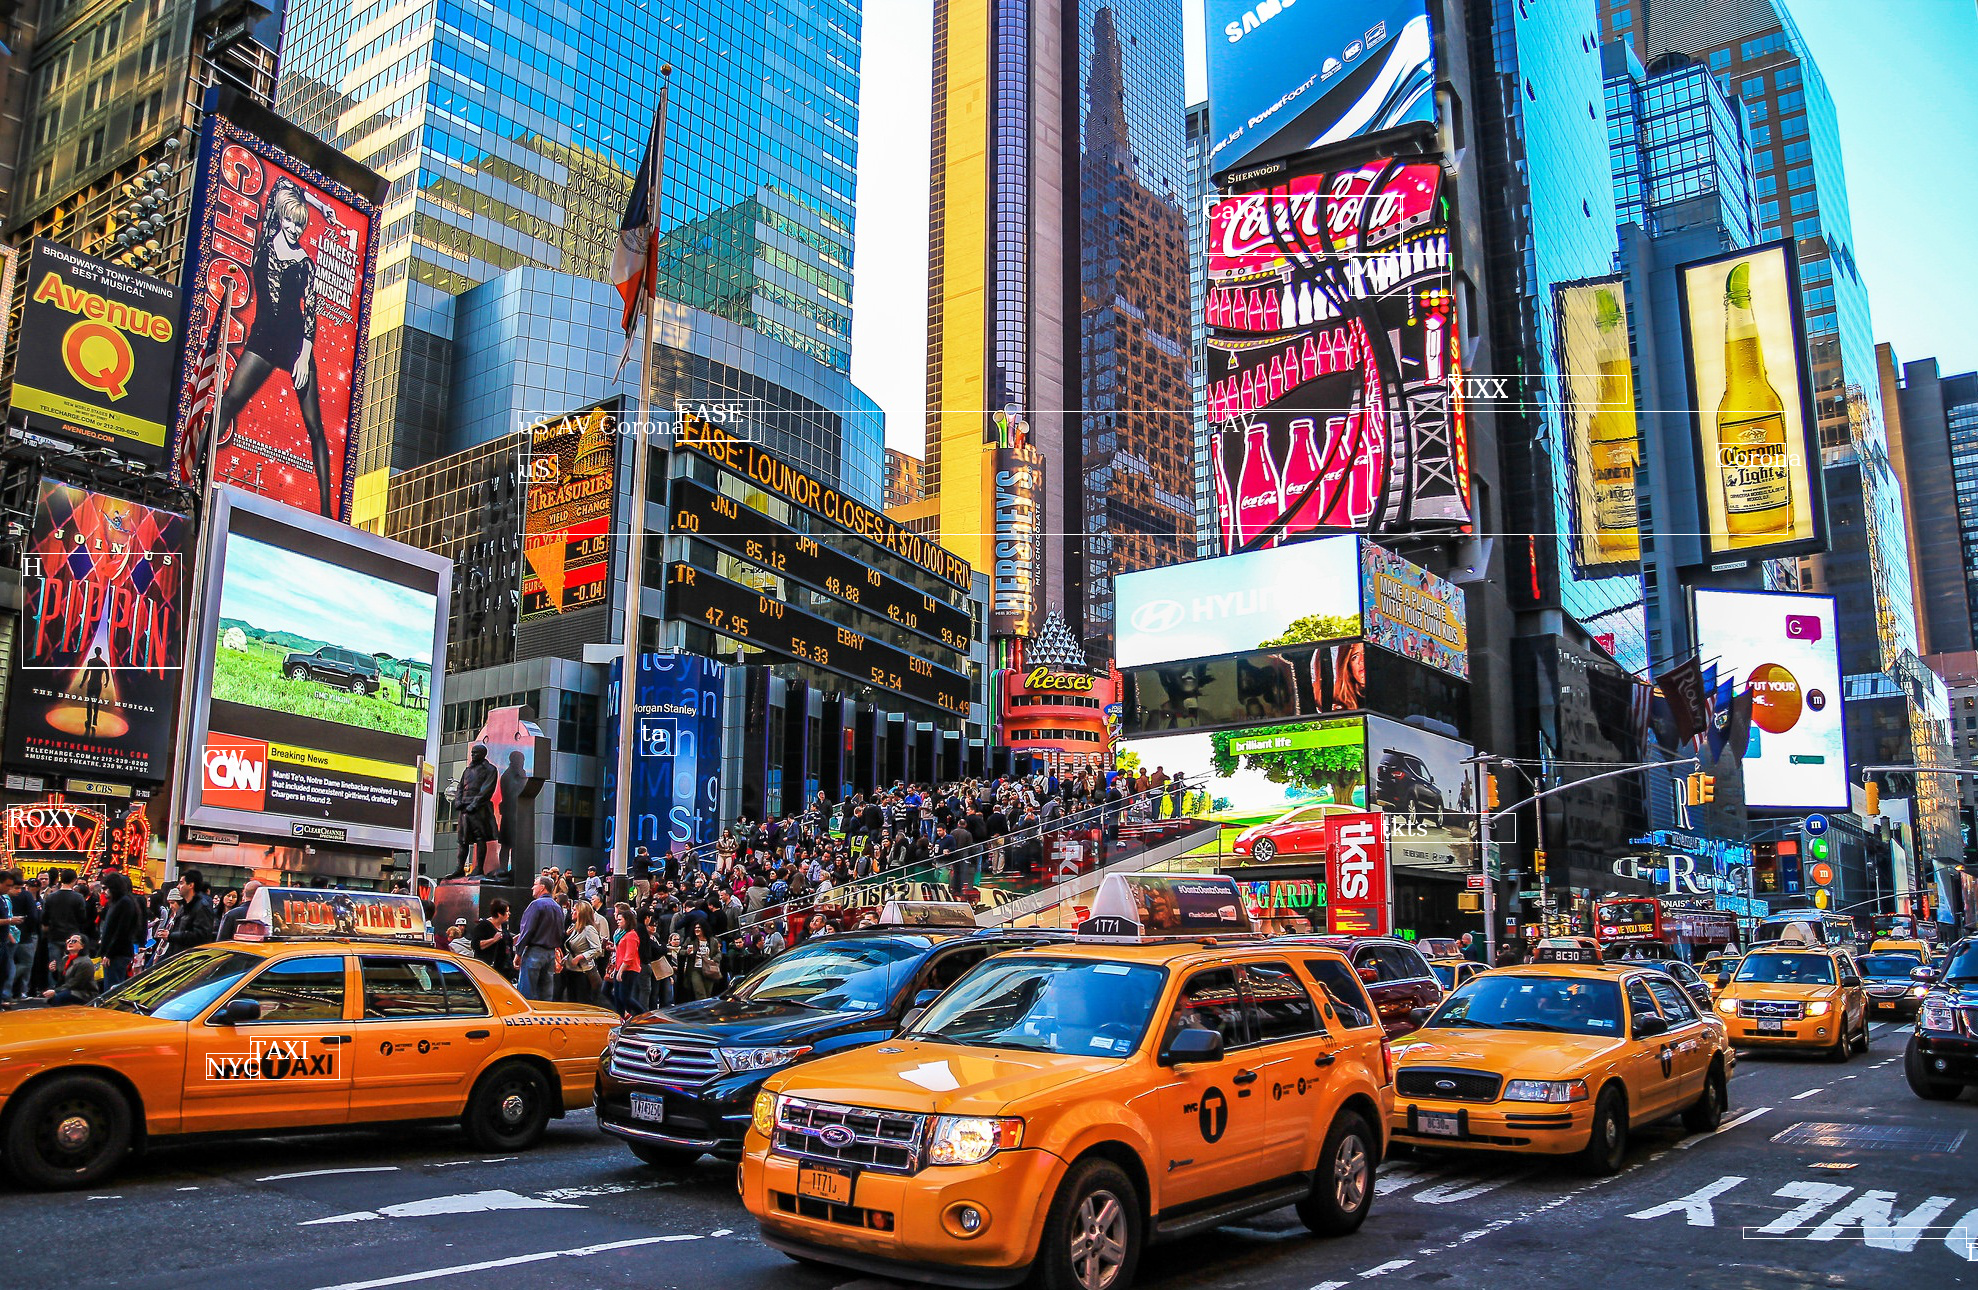

In [42]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

source_img = Image.open('output/TimesSquare_bright.jpg').convert("RGBA")

height = source_img.height
width = source_img.width

draw = ImageDraw.Draw(source_img)

font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSerif.ttf", 24)

for text in response['TextDetections']:
    box = text['Geometry']['BoundingBox']
    x0 = box['Left']*width
    y0 = box['Top']*height
    x1 = (box['Left']+box['Width'])*width
    y1 = (box['Top']+box['Height'])*height
#    print (x0, y0, x1, y1, text['DetectedText'])
    draw.rectangle(((x0, y0), (x1, y1)), outline="white")
    draw.text((x0, y0), text['DetectedText'], font=font, fill=(255,255,255,255))

# save in new file
source_img.save("output/output.png", "PNG")

from IPython.display import Image
Image('output/output.png') 

## Comprehend Examples


In [97]:
import boto3

nlp_client = boto3.client('comprehend')

In [98]:
response = nlp_client.detect_sentiment(
    Text='This was a good meal',
    LanguageCode='en'
)

In [99]:
pd.DataFrame.from_dict(response)

ResponseMetadata Sentiment  \
HTTPHeaders     {u'x-amzn-requestid': u'6c8bc0ce-81e6-11e9-ad3...  POSITIVE   
HTTPStatusCode                                                200  POSITIVE   
Mixed                                                         NaN  POSITIVE   
Negative                                                      NaN  POSITIVE   
Neutral                                                       NaN  POSITIVE   
Positive                                                      NaN  POSITIVE   
RequestId                    6c8bc0ce-81e6-11e9-ad31-33214289625b  POSITIVE   
RetryAttempts                                                   0  POSITIVE   

                SentimentScore  
HTTPHeaders                NaN  
HTTPStatusCode             NaN  
Mixed                 0.007294  
Negative              0.001444  
Neutral               0.050008  
Positive              0.941254  
RequestId                  NaN  
RetryAttempts              NaN

In [100]:
hebrew_text = 'ברוטאלי וקיצוני - קשה לצפייה ודועך. סרט שלישי בטרילוגית סרטים שאיבדה פרופרוציות, רבים מהסצנות נורא אגרסיביות כיאה לז''אנר הזה אבל גם העלילה מתחילה לאבד מעצמה בחיפוש אחר סרטי המשך ורעיונות נוספים. נראה שגם במקרה של ג''ון אבד עליו הקלח.'

response = trans_client.translate_text(
    Text=hebrew_text,
    SourceLanguageCode='auto',
    TargetLanguageCode='en'
)

translated = response['TranslatedText']


In [101]:
response = nlp_client.detect_sentiment(
    Text=translated,
    LanguageCode='en'
)
pd.DataFrame.from_dict(response)

ResponseMetadata Sentiment  \
HTTPHeaders     {u'x-amzn-requestid': u'abf768b9-81e6-11e9-b67...  NEGATIVE   
HTTPStatusCode                                                200  NEGATIVE   
Mixed                                                         NaN  NEGATIVE   
Negative                                                      NaN  NEGATIVE   
Neutral                                                       NaN  NEGATIVE   
Positive                                                      NaN  NEGATIVE   
RequestId                    abf768b9-81e6-11e9-b673-fdb00635b9dc  NEGATIVE   
RetryAttempts                                                   0  NEGATIVE   

                SentimentScore  
HTTPHeaders                NaN  
HTTPStatusCode             NaN  
Mixed                 0.403832  
Negative              0.437359  
Neutral               0.142145  
Positive              0.016664  
RequestId                  NaN  
RetryAttempts              NaN

In [72]:
print translated

Brutal and extreme - hard to watch and fade. A third film in a movie Trilogy that has lost proportions, many of the horribly aggressive scenes as befits this Zanner but also the plot begins to lose power in search of sequels and other ideas. Looks like John's case was lost on him, too.


## Lex (Chatbot) Examples

In [45]:
import boto3

lex_client = boto3.client('lex-runtime')

response = lex_client.post_text(
    botName='OrderFlowers',
    botAlias='Demo',
    userId='0001',
    inputText='I want to order some flowers'
)

response['message']  

u'What type of flowers would you like to order?'

Let's see the interaction from the user's view:

https://lex-web-ui-codebuilddeploy-1dpn54r8z-webappbucket-1l1kjxayod09e.s3.amazonaws.com/index.html